# Notebook for analysing the learning curves

This notebook plots the basic leaning curves of the diayn algorithm provided in the progress.csv file generated from the experiment. log_dir should be pointed at the folder containing the experiment directories:

```
log_dir/
└── exp_1
|   ├── progress.csv
|   ├── itr_1.pkl
|   ├── itr_2.pkl
.   .   ...
.   .   ...
.   .   ...
└── exp_2
|   ├── progress.csv
|   ├── itr_1.pkl
|   ├── itr_2.pkl

```

and use variant_dir_prefix and variant_dir_postfix for filtering the exp_dirs you want to plot.

In [1]:
% matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
log_dir = '/localdata2/nikhil/data/comp767project/diversity_learning/2_fins/'
variant_dir_prefix = 'seed_1'
variant_dir_postfix = ''

In [11]:
! ls $log_dir | grep $variant_dir_prefix

In [4]:
for dir_item in os.listdir(log_dir):
    if os.path.isdir(os.path.join(log_dir, dir_item))\
    and dir_item.startswith(variant_dir_prefix)\
    and dir_item.endswith(variant_dir_postfix):

        temp_dir = os.path.join(log_dir, dir_item)
        progress_data = pd.read_csv(os.path.join(temp_dir, 'progress.csv'))

        n_key = len(progress_data.keys())
        n_cols = 2
        n_rows = n_key/n_cols

print(temp_dir)
print(n_rows, n_cols)

/localdata2/nikhil/data/comp767project/diversity_learning/2_fins/seed_1__snapshot_mode_all__num_skills_10
(26, 2)


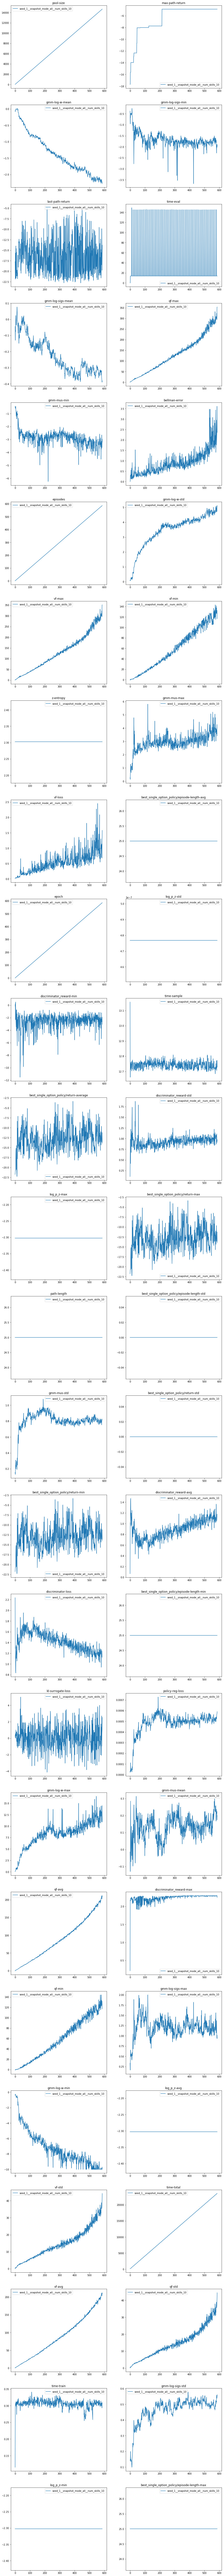

In [6]:
f, ax = plt.subplots(n_rows, n_cols,figsize=(16, 200))

for dir_item in os.listdir(log_dir):
    if os.path.isdir(os.path.join(log_dir, dir_item)) and dir_item.startswith(variant_dir_prefix):
        
        plot_label = dir_item
        dir_item = os.path.join(log_dir, dir_item)

        progress_data = pd.read_csv(os.path.join(dir_item, 'progress.csv'))

        for key_idx, key in enumerate(progress_data.keys()):
            ax_row = key_idx/n_cols
            ax_col = key_idx%n_cols

            ax[ax_row, ax_col].plot(progress_data[key], label=plot_label)
            ax[ax_row, ax_col].set_title(str(key))
            ax[ax_row, ax_col].legend()